In [38]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests
from scipy.stats import linregress
import matplotlib.pyplot as plt 

In [2]:
#Note: The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
# You can only unzip a zipped tuple once before it is removed from the computer's memory.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

63.699433744492126 -158.65553650591937
56.82003349513107 -43.141077951678
12.571219361107495 63.695572800939146
65.07222639407104 -46.00451935537504
62.27753856176372 9.633809208568863
-5.047574894451074 125.59685671241255
79.10331079046728 -82.71378331314753
-35.34358266649366 78.81684181789547
-87.18505366726771 -36.25305879537737
-83.81511807544825 -137.12533473399043
64.72032067747222 -17.75615650820896
-46.43086419274966 105.26280793201573
18.683713025437754 -8.598857239863378
33.11230039231842 -9.195851988828025
81.48601855290238 -106.53113958837689
-0.8437403328877195 -136.30993681399931
-42.58478803720839 107.27445904849947
-76.10369526139802 -165.57589365897212
81.45949665665907 -58.95103373536941
-58.9480035645573 -126.74445390593623
48.57138458528988 -137.59020836633647
-12.363396813013964 107.67468384182615
4.609338304370041 31.484213398239433
85.24667188085246 134.46208881430232
31.41952418994879 87.09896308721596
89.44265610318945 46.00125369333631
62.522153311555655 122.

-54.415808157609625 146.8030517979172
-31.0478885061123 5.489159492834688
-21.35958070438687 41.193441321042144
53.329850985469506 -97.37301921206144
28.93077858692108 -50.32643938044308
-64.8591463321044 -170.31055714486882
-66.37539239974396 155.45340865604368
-52.349162967205714 -77.44962749594087
87.06814586251363 11.800483668217055
-7.066979168423558 -17.784163800045775
-31.57913015546805 49.994008990667396
19.53501865612047 -139.5771074810786
-32.31095983020216 -78.80483418923144
-20.553649932853133 -10.761300737690874
-74.67250405588916 31.013285299073573
-39.58195377894209 168.59230731099336
-40.12946888535724 109.1049692302451
28.430147136702942 32.19345143915129
-54.30442744068335 146.86636670938157
-0.9388756428423477 -110.5063940527
76.96068330705987 110.72387621392437
81.02031411379289 -54.32918566275626
-61.53264003922097 -170.34069845683044
-40.94403851076538 90.25409236152524
-56.13927889962273 4.52095346940294
-57.838645623721355 29.74930734324218
25.90383088621512 164

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [6]:
# base url 

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID="+ weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | nanortalik
Processing Record 3 of Set 1 | kavaratti
Processing Record 4 of Set 1 | qaqortoq
Processing Record 5 of Set 1 | oppdal
Processing Record 6 of Set 1 | ambon
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | bambous virieux
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | akureyri
Processing Record 12 of Set 1 | busselton
Processing Record 13 of Set 1 | nioro
Processing Record 14 of Set 1 | asfi
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | upernavik
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | kawalu
Processing Record 21 of Set 1 | juba
Processing Record 22 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 23 of Set 1 

Processing Record 32 of Set 4 | cockburn town
Processing Record 33 of Set 4 | ribeira grande
Processing Record 34 of Set 4 | alenquer
Processing Record 35 of Set 4 | hvide sande
Processing Record 36 of Set 4 | gamba
Processing Record 37 of Set 4 | mineiros
Processing Record 38 of Set 4 | san patricio
Processing Record 39 of Set 4 | atasu
Processing Record 40 of Set 4 | sayyan
Processing Record 41 of Set 4 | aklavik
Processing Record 42 of Set 4 | bamnet narong
Processing Record 43 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | thompson
Processing Record 47 of Set 4 | wulanhaote
City not found. Skipping...
Processing Record 48 of Set 4 | jiwani
Processing Record 49 of Set 4 | padang
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | civitanova marche
Processing Record 2 of Set 5 | tual
Processing Record 3 of Set 5 | narsaq
Processing Record 4 of Set 5 |

Processing Record 23 of Set 8 | vao
Processing Record 24 of Set 8 | pasighat
Processing Record 25 of Set 8 | ramanathapuram
Processing Record 26 of Set 8 | tougan
Processing Record 27 of Set 8 | sangin
Processing Record 28 of Set 8 | havre-saint-pierre
Processing Record 29 of Set 8 | sao joao batista
Processing Record 30 of Set 8 | libertador general san martin
Processing Record 31 of Set 8 | natal
Processing Record 32 of Set 8 | tabialan
City not found. Skipping...
Processing Record 33 of Set 8 | alta floresta
Processing Record 34 of Set 8 | dauphin
Processing Record 35 of Set 8 | kaitangata
Processing Record 36 of Set 8 | misratah
Processing Record 37 of Set 8 | balabac
Processing Record 38 of Set 8 | maceio
Processing Record 39 of Set 8 | pevek
Processing Record 40 of Set 8 | faya
Processing Record 41 of Set 8 | zhurivka
Processing Record 42 of Set 8 | krasnoselkup
Processing Record 43 of Set 8 | barbar
City not found. Skipping...
Processing Record 44 of Set 8 | tiznit
Processing Re

Processing Record 12 of Set 12 | henties bay
Processing Record 13 of Set 12 | mrakovo
Processing Record 14 of Set 12 | moose factory
Processing Record 15 of Set 12 | hernani
Processing Record 16 of Set 12 | bojnurd
Processing Record 17 of Set 12 | rocha
Processing Record 18 of Set 12 | cambridge
Processing Record 19 of Set 12 | celestun
Processing Record 20 of Set 12 | bam
Processing Record 21 of Set 12 | koumac
Processing Record 22 of Set 12 | bantogon
Processing Record 23 of Set 12 | ambulu
Processing Record 24 of Set 12 | maneadero
Processing Record 25 of Set 12 | san policarpo
Processing Record 26 of Set 12 | kimbe
Processing Record 27 of Set 12 | vesoul
Processing Record 28 of Set 12 | le port
Processing Record 29 of Set 12 | santa ana
Processing Record 30 of Set 12 | lalmohan
Processing Record 31 of Set 12 | denpasar
Processing Record 32 of Set 12 | gorodishche
Processing Record 33 of Set 12 | grand gaube
Processing Record 34 of Set 12 | palauig
Processing Record 35 of Set 12 | p

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,77.36,80,0,7.02,US,2022-08-30 01:33:06
1,Nanortalik,60.1432,-45.2371,39.74,89,100,6.71,GL,2022-08-30 01:33:07
2,Kavaratti,10.5669,72.6420,80.46,80,100,18.54,IN,2022-08-30 01:33:07
3,Qaqortoq,60.7167,-46.0333,39.65,88,97,4.74,GL,2022-08-30 01:33:08
4,Oppdal,62.5943,9.6912,40.01,92,81,1.86,NO,2022-08-30 01:33:08
5,Ambon,-3.6954,128.1814,82.54,83,75,3.44,ID,2022-08-30 01:33:09
6,Qaanaaq,77.4840,-69.3632,26.10,66,0,4.18,GL,2022-08-30 01:33:09
7,Bambous Virieux,-20.3428,57.7575,66.45,88,40,3.44,MU,2022-08-30 01:33:09
8,Ushuaia,-54.8000,-68.3000,40.66,87,75,4.61,AR,2022-08-30 01:33:10
9,Rikitea,-23.1203,-134.9692,73.63,83,9,13.40,PF,2022-08-30 01:33:10


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

## Plotting the Data

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


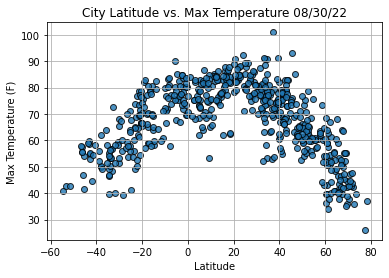

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

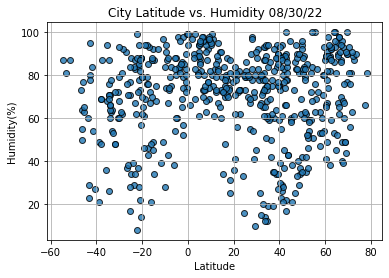

In [17]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

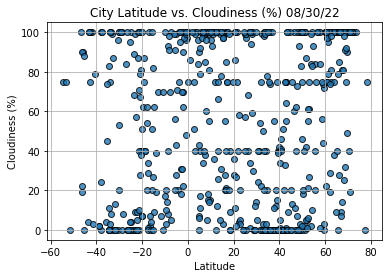

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

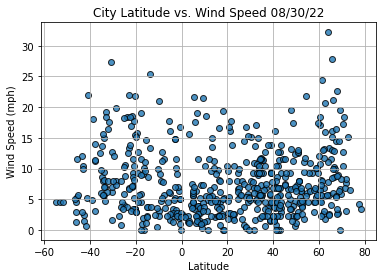

In [34]:
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()



## Linear Regression

In [35]:
# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

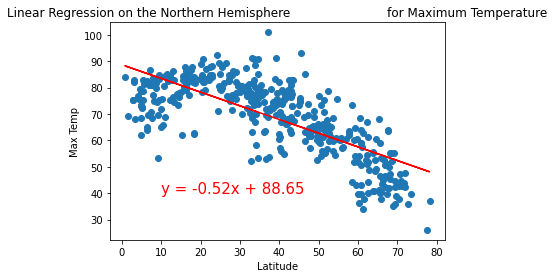

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

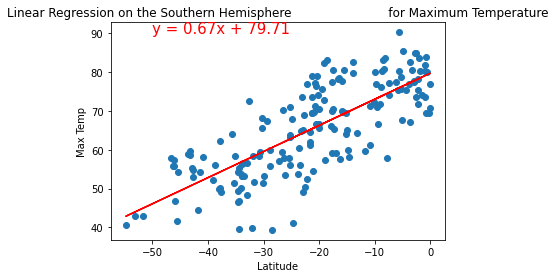

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))